<a href="https://colab.research.google.com/github/yareth03/Simulaci-n-1/blob/main/Triangular_TI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Media muestral: 2.9837 vs Media teórica: 3.0000
Desviación estándar muestral: 0.8121 vs Desviación teórica: 0.8165


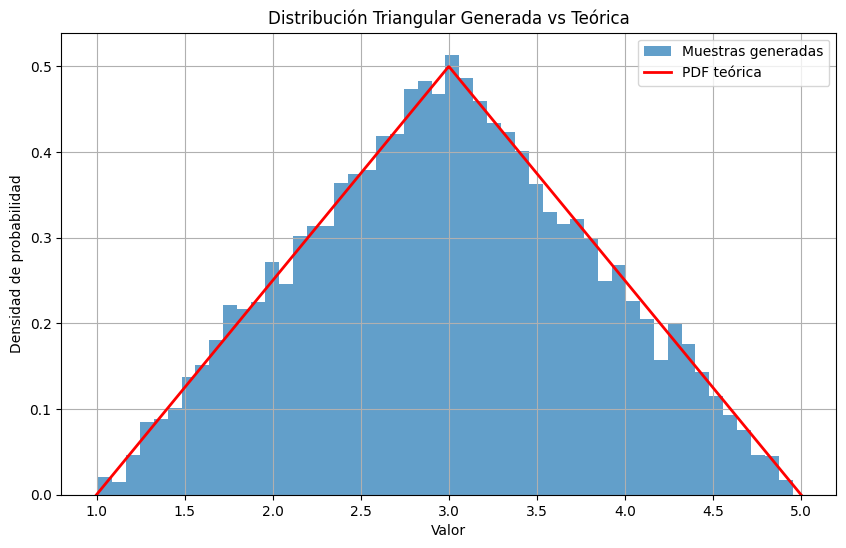

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Parámetros de la distribución triangular
minimo = 1   # a
maximo = 5   # b
moda = 3     # c

# Función de distribución acumulativa inversa (transformada inversa)
def transformada_inversa_triangular(u, minimo, maximo, moda):
    # Calculamos la posición relativa de la moda
    posicion_moda = (moda - minimo) / (maximo - minimo)

    # Aplicamos transformada inversa como se pide
    condicion = u <= posicion_moda
    x = np.where(condicion,
                 minimo + np.sqrt(u * (maximo - minimo) * (moda - minimo)),
                 maximo - np.sqrt((1 - u) * (maximo - minimo) * (maximo - moda)))
    return x

np.random.seed(42)  # Para reproducibilidad
numero_muestras = 10000
uniformes = np.random.rand(numero_muestras)
muestras = transformada_inversa_triangular(uniformes, minimo, maximo, moda)

# Cálculo de estadísticas de la muestra
media_muestral = np.mean(muestras)
desviacion_muestral = np.std(muestras)

# Cálculo de datos estadísticos teoricos
parametro_c = (moda - minimo) / (maximo - minimo)
distribucion_teorica = triang(c=parametro_c, loc=minimo, scale=(maximo-minimo))
media_teorica = distribucion_teorica.mean()
desviacion_teorica = distribucion_teorica.std()

# Resultados
print(f"Media muestral: {media_muestral:.4f} vs Media teórica: {media_teorica:.4f}")
print(f"Desviación estándar muestral: {desviacion_muestral:.4f} vs Desviación teórica: {desviacion_teorica:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(muestras, bins=50, density=True, alpha=0.7, label='Muestras generadas')

valores_x = np.linspace(minimo, maximo, 1000)
plt.plot(valores_x, distribucion_teorica.pdf(valores_x), 'r-', lw=2, label='PDF teórica')

plt.title('Distribución Triangular Generada vs Teórica')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()